In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/RAJESH/Of_Cr.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:8040]
test_data = df.iloc[8040:]

In [5]:
len(train_data),len(test_data)

(8040, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (8016, seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (8016, 24, 1)
y_train.shape =  (8016,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
63/63 [==============================] - 3s 11ms/step - loss: 3.2839
Epoch 2/300
63/63 [==============================] - 1s 10ms/step - loss: 0.8889
Epoch 3/300
63/63 [==============================] - 1s 11ms/step - loss: 0.6883
Epoch 4/300
63/63 [==============================] - 1s 10ms/step - loss: 0.5778
Epoch 5/300
63/63 [==============================] - 1s 10ms/step - loss: 0.5069
Epoch 6/300
63/63 [==============================] - 1s 10ms/step - loss: 0.4602
Epoch 7/300
63/63 [==============================] - 1s 10ms/step - loss: 0.4333
Epoch 8/300
63/63 [==============================] - 1s 10ms/step - loss: 0.4168
Epoch 9/300
63/63 [==============================] - 1s 10ms/step - loss: 0.4044
Epoch 10/300
63/63 [==============================] - 1s 10ms/step - loss: 0.3962
Epoch 11/300
63/63 [==============================] - 1s 10ms/step - loss: 0.3903
Epoch 12/300
63/63 [==============================] - 1s 10ms/step - loss: 0.3796
Epoch 13/300
63/63 [=====

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 0.5102678327452976
Root Mean Squared Error for LSTM Model for testing is: 0.5438782022736205
Mean Absolute Error for LSTM Model for training is: 0.4009092980148186
Mean Absolute Error for LSTM Model for testing is: 0.4272725259988183
MAPE for LSTM Model for training is: 0.13505546711688485
MAPE for LSTM Model for testing is: 0.14067775513460917


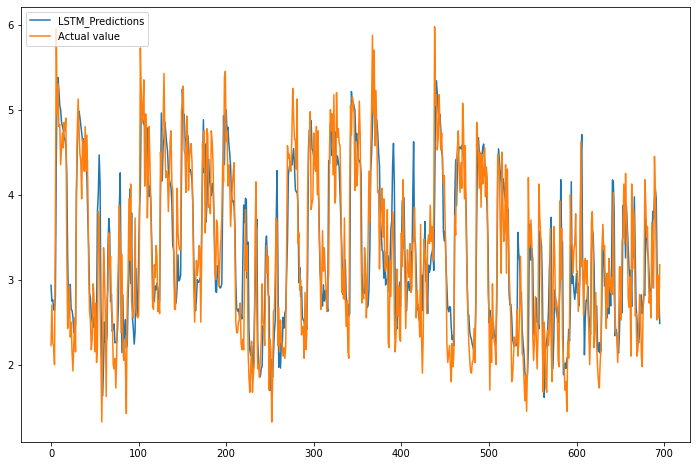

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([2.2249999]), array([2.9335592], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.70855927]), array([-0.04644632]), array([-0.51311255]), array([-0.42693543]), array([-0.6356504]), array([0.92713046]), array([1.57882929]), array([-0.37220669]), array([-0.07683468]), array([-0.42903137]), array([-0.22008801]), array([-0.64741468]), array([-0.30404568]), array([-0.08377457]), array([-0.21058559]), array([0.189363]), array([0.10430765]), array([0.3305707]), array([-0.91248083]), array([-0.84264708]), array([-0.08549857]), array([0.16686249]), array([-0.61953783]), array([-0.14554906]), array([-0.49010301]), array([-0.63806295]), array([-0.15338588]), array([0.16898489]), array([-0.31933403]), array([0.03632307]), array([0.23983717]), array([0.27488327]), array([-0.20714235]), array([-0.43347025]), array([-0.41707373]), array([-0.78417945]), array([0.01393938]), array([-0.18106508]), array([-0.30206728]), array([0.32953739]), array([-0.17875862]), array([0.51857233]), array([0.39430285]), array([-0.24716425]), array([-0.21779227]), array([-0.26032639]), array

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.01612329]), array([-1.70276022]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(379, 317)